<a href="https://colab.research.google.com/github/inuwamobarak/Phone-Data-Analysis-and-Price-Prediction/blob/main/Mobile_Phone_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mobile Phone Price Range Prediction and Analysis

## Introduction

The goal of this work is to use the features of the phone as variables to address the issue of providing a standardized phone sales rate. In order to identify trends and understand how users and the market behave, analysis is also done on the features.

* The considered phone features include:
    * id:ID
    * battery_power:Total energy a battery can store in one time measured in mAh
    * blue:Has bluetooth or not
    * clock_speed:speed at which microprocessor executes instructions
    * dual_sim:Has dual sim support or not
    * fc:Front Camera mega pixels
    * four_g:Has 4G or not
    * int_memory:Internal Memory in Gigabytes
    * m_dep:Mobile Depth in cm
    * mobile_wt:Weight of mobile phone
    * n_cores:Number of cores of processor
    * pc:Primary Camera mega pixels
    * px_height:Pixel Resolution Height
    * px_width:Pixel Resolution Width
    * ram:Random Access Memory in Megabytes
    * sc_h:Screen Height of mobile in cm
    * sc_w:Screen Width of mobile in cm
    * talk_time:longest time that a single battery charge will last when you are
    * three_g:Has 3G or not
    * touch_screen:Has touch screen or not
    * wifi:Has wifi or not





## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset of phones
dataset = pd.read_csv('/content/train.csv')

In [3]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Analysis

In [4]:
dataset.shape

(2000, 21)

The dataset consists of 2000 phone entries with 21 attributes.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

The Non-Null Count column reveals that there are exactly 2000 entries, making them all complete. The Dtype reveals that they are all numbers.

In [6]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Exploratory Data Analysis (EDA)

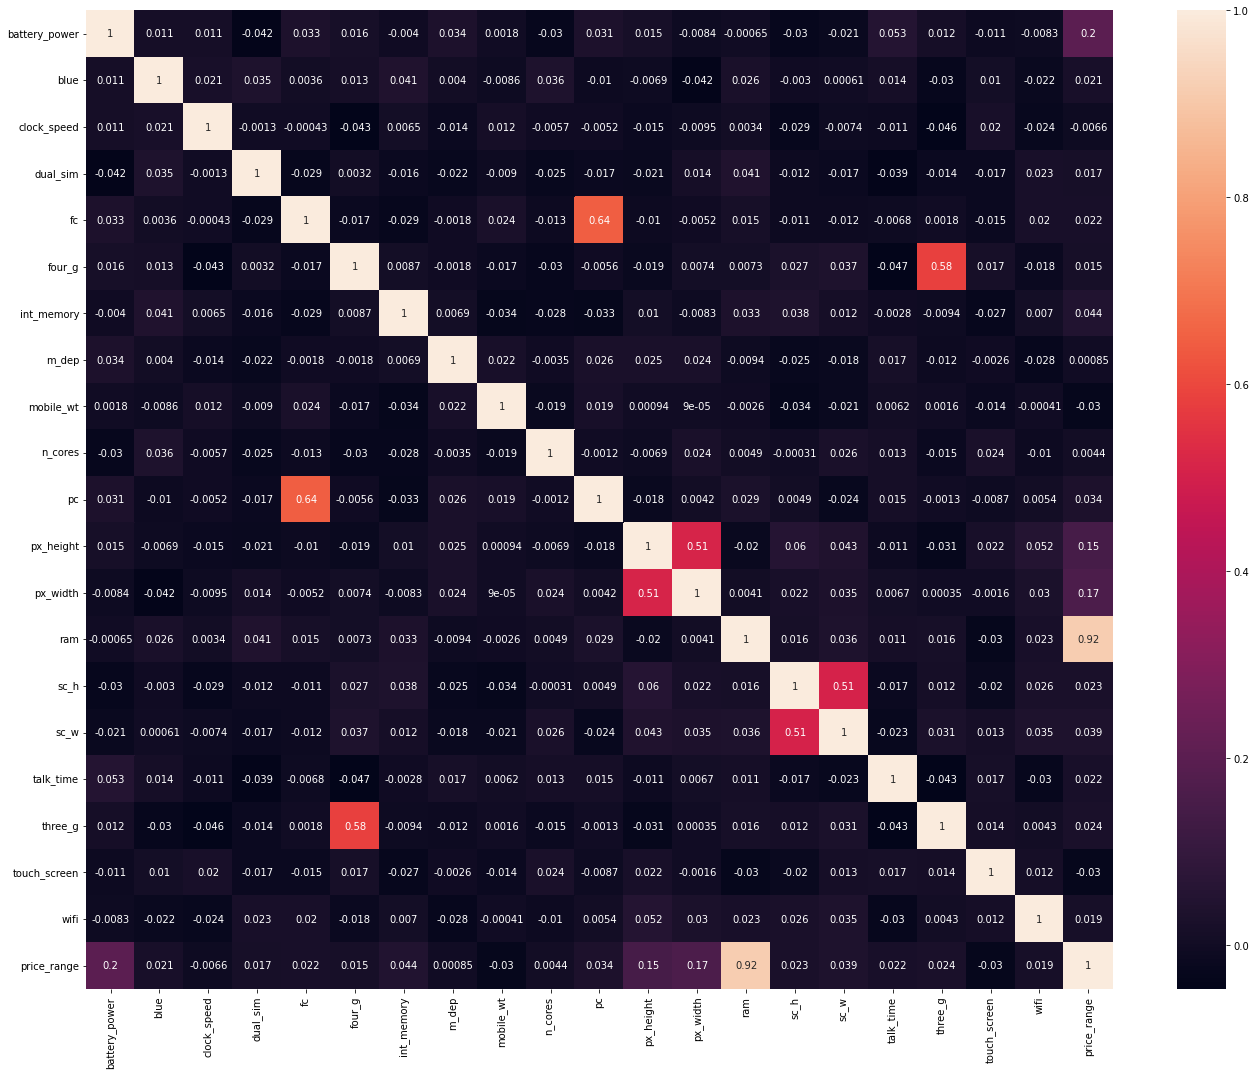

In [7]:
# Draw a heatmap with the numeric values in each cell
plt.figure(figsize=(23,18))
sns.heatmap(dataset.corr(),annot=True)

For me, it is more convenient to run a general view of all the variables first so that I can get a quick overview of the dataset before deciding what to concentrate on.
We will use the phone price as our point of reference because it is the most crucial piece of information. Specifically, we will compare the other features based on price range.

It shows that:
*   RAM
*   battery_power
*   px_height
*   px_widght
*   int_memory
*   pc
*   sc_w
has positive effect on the cost of a phone. We will focus on these for EDA.

Other features such as mobile_wt affects phone price negatively.

## Finding Correlation between phone RAMs and their Prices

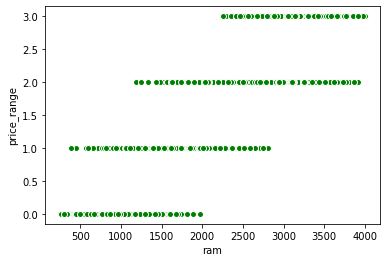

In [8]:
sns.scatterplot(x='ram',y='price_range', data=dataset, color='g',linewidth=1);

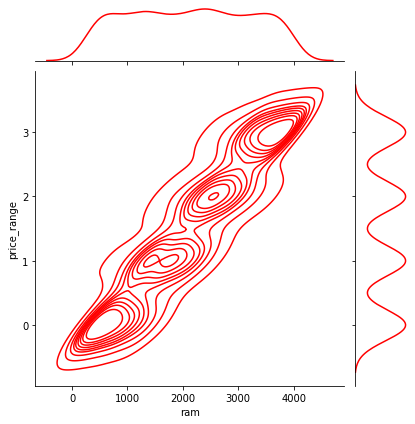

In [9]:
sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde');

The two plots up top demonstrate that the two variables, or phone features, have a positive correlation with one another. This implies that as a phone's RAM size increases, so do its prices. Therefore, RAM may be a very valuable feature for phone value.

## Finding the relationship between Battery Power and Price of phone

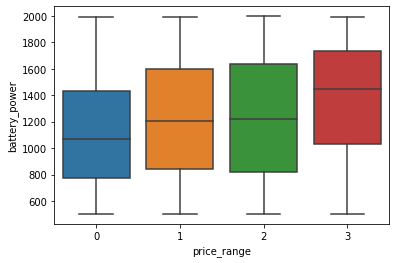

In [10]:
sns.boxplot(x="price_range", y="battery_power", data=dataset)

## Finding relationship between px_height and Price Range

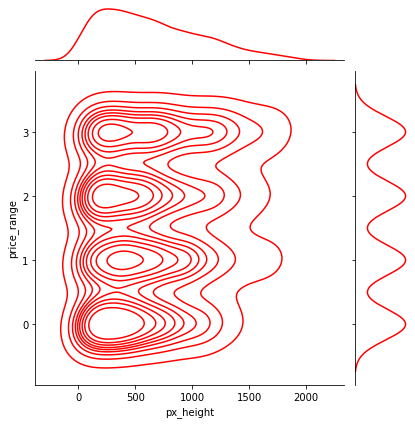

In [11]:
sns.jointplot(x='px_height',y='price_range',data=dataset,color='red',kind='kde');

## Finding relationship between px_width and Price Range

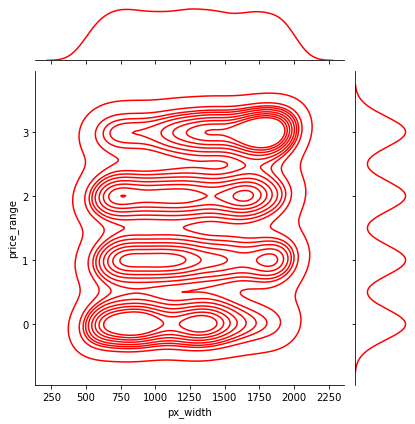

In [12]:
sns.jointplot(x='px_width',y='price_range',data=dataset,color='red',kind='kde');

## Finding relationship between Internal Memory and Price Range

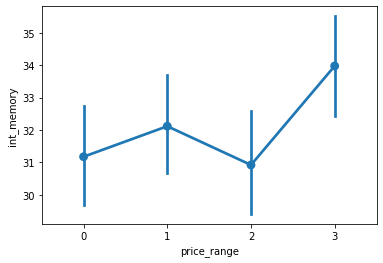

In [13]:
sns.pointplot(y="int_memory", x="price_range", data=dataset)

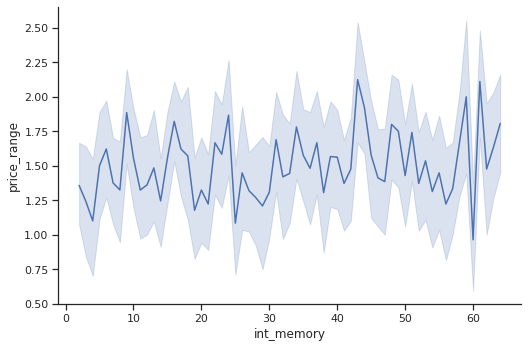

In [14]:
sns.set_theme(style="ticks")
# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=dataset,
    x="int_memory", y="price_range", kind="line", palette=palette,
    height=5, aspect=1.5, facet_kws=dict(sharex=False),
)

- Though the second graph does not work well here with the variables/distribution hence it does not show details well. The other two shows a slight increase in the price in respect to an increase in the internal memory of phones.

## Finding relationship between Mobile weight and Price Range

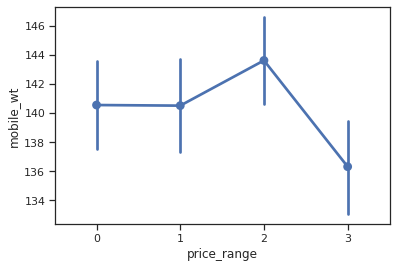

In [15]:
sns.pointplot(y="mobile_wt", x="price_range", data=dataset)

The graph up top illustrates the unfavorable trend that prices fall as phone weight increases. A mobile company might think about making phones lighter.

# Percentages of certain binary features

Percentage of Phones that have Bluetooth feature

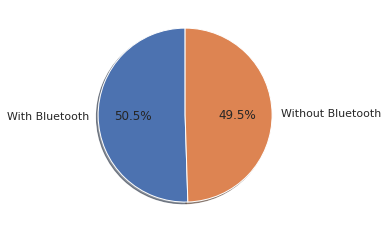

In [16]:
labels = ["With Bluetooth",'Without Bluetooth']
values=dataset['blue'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

### Percentage of Phones with Dual Sim feature

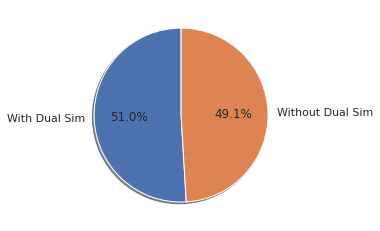

In [17]:
labels = ["With Dual Sim",'Without Dual Sim']
values=dataset['dual_sim'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

## Percentage of Phones that supports 4G

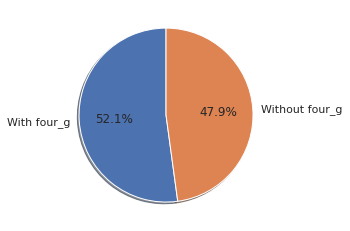

In [18]:
labels = ["With four_g",'Without four_g']
values=dataset['four_g'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

## Percentage of Phones that supports 3G

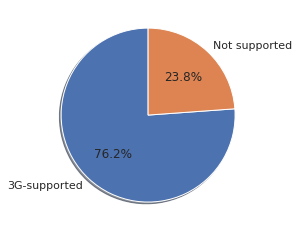

In [19]:
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

# Prediction Model Building

In [20]:
#Splitting X and Y
X=dataset.drop('price_range',axis=1)

In [21]:
y=dataset['price_range']

In [22]:
#Importing requirement
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Using Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train,y_train)

LinearRegression()

In [25]:
LR.score(X_test,y_test)

0.9132801488185277

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


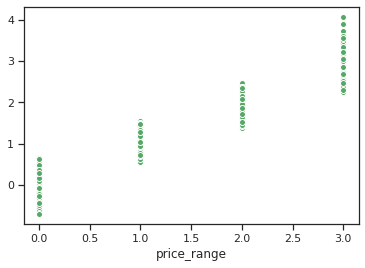

In [26]:
y_pred=LR.predict(X_test)
sns.scatterplot(y_test, y_pred, color='g',linewidth=1);

## Using KNN Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)

KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [28]:
KNN.score(X_test,y_test)

0.9212121212121213

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

pred = KNN.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       158
           1       0.87      0.94      0.91       152
           2       0.92      0.85      0.88       199
           3       0.93      0.92      0.93       151

    accuracy                           0.92       660
   macro avg       0.92      0.93      0.92       660
weighted avg       0.92      0.92      0.92       660



# KNN has a better prediction of 92%